In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
df = pd.read_csv('tomato_NO_OUTLIERS.csv')

In [2]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y-%m-%d")
df = df.set_index("DATE")

In [3]:
df[df.index.duplicated(keep=False)]

,Unnamed: 0,MODAL
DATE,,


In [4]:
df = df[~df.index.duplicated(keep='first')]

In [5]:
df[df.index.duplicated(keep=False)]

,Unnamed: 0,MODAL
DATE,,


In [6]:
df = df.resample('1D').interpolate(mehod= "linear")

In [7]:
window_size = 7
data = df.rolling(window_size).mean()

In [8]:
for i in range(window_size):
    data['MODAL'][i] = df['MODAL'][i]
df = data

In [9]:
df = df.reset_index()

<AxesSubplot:ylabel='MODAL'>

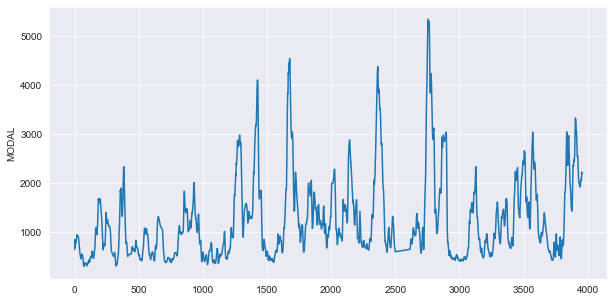

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(10,5))
sns.lineplot(data= df['MODAL'], ax= axes)

In [11]:
start_idx = df.index[df.DATE == '2012-01-01'][0]
end_idx = df.index[df.DATE == '2019-12-31'][0] + 1
data = df[start_idx:end_idx]
data = data.reset_index()
data

,index,DATE,Unnamed: 0,MODAL
0,730,2012-01-01,727.0,483.265306
1,731,2012-01-02,728.0,485.510204
2,732,2012-01-03,729.0,485.306122
3,733,2012-01-04,730.0,482.653061
4,734,2012-01-05,731.0,477.551020
...,...,...,...,...
2917,3647,2019-12-27,3644.0,950.000000
2918,3648,2019-12-28,3645.0,985.714286
2919,3649,2019-12-29,3646.0,1000.000000
2920,3650,2019-12-30,3647.0,1028.571429


In [12]:
# df[df['DATE'] == data['DATE'][start_idx] - relativedelta(years=1)]
col = 'DATE'
one_year = []
second_year = []
for i in range(0, len(data[col])):
    diff1 = data[col][i] - relativedelta(years = 1)
    diff2 = data[col][i] - relativedelta(years = 2)
    if diff1 in df.values:
        one_year.append(df.loc[df[col] == diff1, 'MODAL'].iloc[0])
    else:
        one_year.append(None)
    if diff2 in df.values:
        second_year.append(df.loc[df[col] == diff2, 'MODAL'].iloc[0])
    else:
        second_year.append(None)

In [13]:
data = data.assign(one_year = one_year, second_year = second_year)

In [14]:
data.isnull().values.any()

False

In [15]:
df = data.drop(['index', 'DATE'], axis = 1)

In [16]:
col = df.columns
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(data = x_scaled, columns = col)
df

,Unnamed: 0,MODAL,one_year,second_year
0,0.000000,0.028622,0.276776,0.069138
1,0.000342,0.029072,0.260582,0.069138
2,0.000685,0.029031,0.237721,0.103877
3,0.001027,0.028500,0.215574,0.108839
4,0.001369,0.027479,0.204858,0.079063
...,...,...,...,...
2917,0.998631,0.121986,0.146174,0.049084
2918,0.998973,0.129130,0.160462,0.043615
2919,0.999315,0.131988,0.176894,0.043615
2920,0.999658,0.137703,0.193427,0.048578


In [17]:
train_set, test_set = train_test_split(df,test_size=0.20,random_state=42)
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set['MODAL']
X_test = test_set.drop('MODAL', 1)

In [18]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 0.16785617745008458 Mean of MODAL: 0.19483645024836502
R2 score is 0.0902002524452139


In [19]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING:
Root MSE of the model: 0.17650670658433534 Mean of MODAL: 0.19885684317971083
R2 score is 0.0965270073661314


In [20]:
data

,index,DATE,Unnamed: 0,MODAL,one_year,second_year
0,730,2012-01-01,727.0,483.265306,1723.809524,650.000000
1,731,2012-01-02,728.0,485.510204,1642.857143,650.000000
2,732,2012-01-03,729.0,485.306122,1528.571429,825.000000
3,733,2012-01-04,730.0,482.653061,1417.857143,850.000000
4,734,2012-01-05,731.0,477.551020,1364.285714,700.000000
...,...,...,...,...,...,...
2917,3647,2019-12-27,3644.0,950.000000,1070.918367,548.979592
2918,3648,2019-12-28,3645.0,985.714286,1142.346939,521.428571
2919,3649,2019-12-29,3646.0,1000.000000,1224.489796,521.428571
2920,3650,2019-12-30,3647.0,1028.571429,1307.142857,546.428571


In [21]:
df = data.drop(['index'], axis = 1)

In [22]:
end_index = df.index[df.DATE == '2017-12-31'][0] + 1
train_set = df[0:end_index]
train_set = train_set.drop(['DATE'], axis = 1)
index1 = df.index[df.DATE == '2018-01-01'][0]
index2 = df.index[df.DATE == '2018-12-31'][0] + 1
test_set1 = df[index1:index2]
test_set1 = test_set1.drop(['DATE'], axis = 1)
index1 = df.index[df.DATE == '2019-01-01'][0]
index2 = df.index[df.DATE == '2019-12-31'][0] + 1
test_set2 = df[index1:index2]
test_set2 = test_set2.drop(['DATE'], axis = 1)

In [23]:
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set1['MODAL']
X_test = test_set1.drop('MODAL', 1)

In [24]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 899.4894802099293 Mean of MODAL: 1371.021631382644
R2 score is 0.10972994945555703


In [25]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING 2018 data:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING 2018 data:
Root MSE of the model: 1013.2182985386944 Mean of MODAL: 788.679060665364
R2 score is -4.326445474733073


In [26]:
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set2['MODAL']
X_test = test_set2.drop('MODAL', 1)

In [27]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 899.4894802099293 Mean of MODAL: 1371.021631382644
R2 score is 0.10972994945555703


In [28]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING 2019 data:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING 2019 data:
Root MSE of the model: 643.0019634241844 Mean of MODAL: 1530.58708414873
R2 score is -0.2007706397964817


<AxesSubplot:>

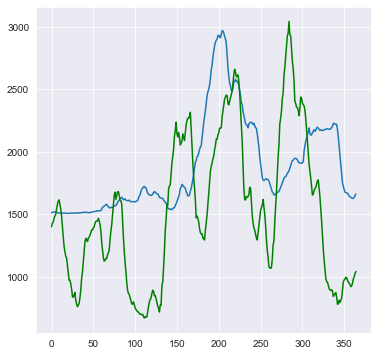

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(6,6))
sns.lineplot(data= lin_Y_test_predict.tolist(), ax= axes)
sns.lineplot(data= Y_test.tolist(), ax= axes, color = 'green')